In [1]:
import functions as f
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
# Set parameters
S = 100      # Current stock price
K = 110      # Strike price
T = 1        # Time to maturity in years
r = 0.05     # Risk-free interest rate
sigma = 0.2  # Volatility

# Calculate call and put prices using imported functions
call_price = f.black_scholes_call(S, K, T, r, sigma)
put_price = f.black_scholes_put(S, K, T, r, sigma)

print(f"Call Price: {call_price:.2f}")
print(f"Put Price: {put_price:.2f}")

Call Price: 6.04
Put Price: 10.68


In [3]:
# Calculate Greeks for call and put options
delta_c = f.delta_call(S, K, T, r, sigma)
delta_p = f.delta_put(S, K, T, r, sigma)
gamma_val = f.gamma(S, K, T, r, sigma)
vega_val = f.vega(S, K, T, r, sigma)
theta_c = f.theta_call(S, K, T, r, sigma)
theta_p = f.theta_put(S, K, T, r, sigma)
rho_c = f.rho_call(S, K, T, r, sigma)
rho_p = f.rho_put(S, K, T, r, sigma)

print(f"Call Delta: {delta_c:.4f}")
print(f"Put Delta: {delta_p:.4f}")
print(f"Gamma: {gamma_val:.4f}")
print(f"Vega: {vega_val:.4f}")
print(f"Call Theta: {theta_c:.4f}")
print(f"Put Theta: {theta_p:.4f}")
print(f"Call Rho: {rho_c:.4f}")
print(f"Put Rho: {rho_p:.4f}")

Call Delta: 0.4496
Put Delta: -0.5504
Gamma: 0.0198
Vega: 39.5760
Call Theta: -5.9038
Put Theta: -0.6721
Call Rho: 38.9247
Put Rho: -65.7105


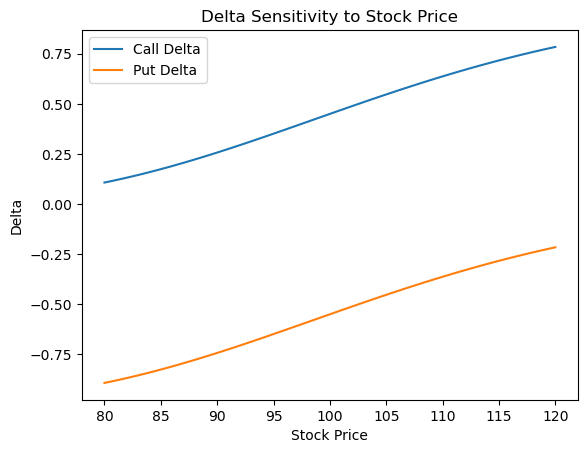

In [4]:
# Parameter range for stock price
stock_prices = np.linspace(80, 120, 100)

# Calculate call and put Delta for each stock price
deltas_call = [f.delta_call(S, K=110, T=1, r=0.05, sigma=0.2) for S in stock_prices]
deltas_put = [f.delta_put(S, K=110, T=1, r=0.05, sigma=0.2) for S in stock_prices]

# Plot Delta against stock price
plt.plot(stock_prices, deltas_call, label="Call Delta")
plt.plot(stock_prices, deltas_put, label="Put Delta")
plt.xlabel("Stock Price")
plt.ylabel("Delta")
plt.title("Delta Sensitivity to Stock Price")
plt.legend()
plt.show()

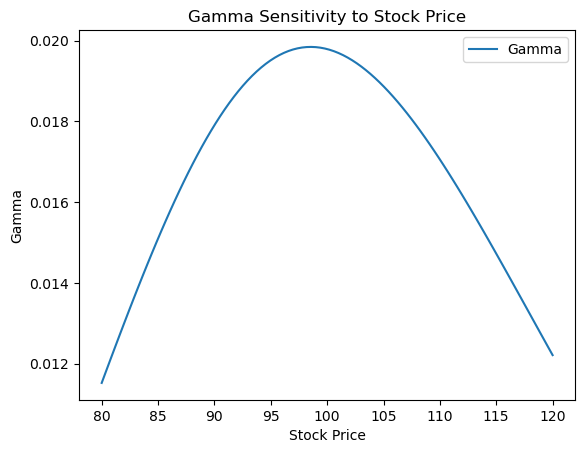

In [12]:
# Gamma Sensitivity to Stock Price
gammas = [f.gamma(S, K=110, T=1, r=0.05, sigma=0.2) for S in stock_prices]

# Plot Gamma against stock price
plt.plot(stock_prices, gammas, label="Gamma")
plt.xlabel("Stock Price")
plt.ylabel("Gamma")
plt.title("Gamma Sensitivity to Stock Price")
plt.legend()
plt.show()

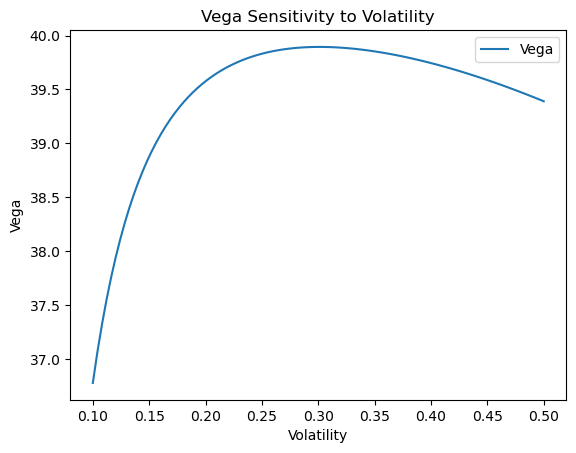

In [14]:
# Parameter range for volatility
volatilities = np.linspace(0.1, 0.5, 100)

# Calculate Vega for each volatility level
vegas = [f.vega(S=100, K=110, T=1, r=0.05, sigma=sigma) for sigma in volatilities]

# Plot Vega against volatility
plt.plot(volatilities, vegas, label="Vega")
plt.xlabel("Volatility")
plt.ylabel("Vega")
plt.title("Vega Sensitivity to Volatility")
plt.legend()
plt.show()


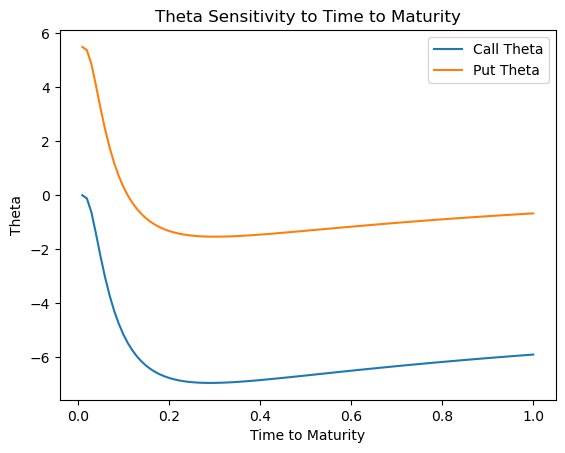

In [16]:
# Parameter range for time to maturity
maturities = np.linspace(0.01, 1, 100)  # Avoid T=0 to prevent division by zero in Black-Scholes

# Calculate call and put Theta for each maturity
thetas_call = [f.theta_call(S=100, K=110, T=T, r=0.05, sigma=0.2) for T in maturities]
thetas_put = [f.theta_put(S=100, K=110, T=T, r=0.05, sigma=0.2) for T in maturities]

# Plot Theta against time to maturity
plt.plot(maturities, thetas_call, label="Call Theta")
plt.plot(maturities, thetas_put, label="Put Theta")
plt.xlabel("Time to Maturity")
plt.ylabel("Theta")
plt.title("Theta Sensitivity to Time to Maturity")
plt.legend()
plt.show()


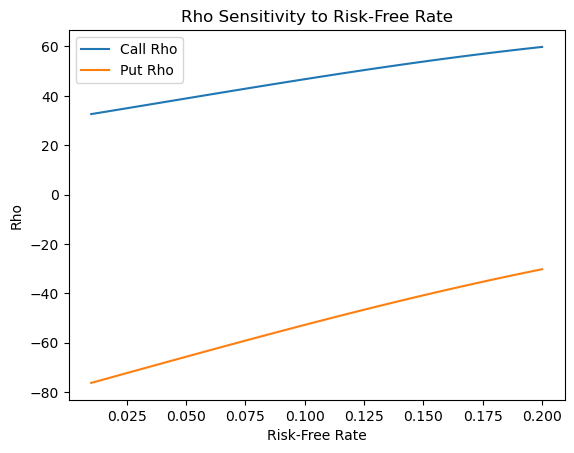

In [18]:
# Parameter range for risk-free rate
risk_free_rates = np.linspace(0.01, 0.2, 100)

# Calculate call and put Rho for each risk-free rate
rhos_call = [f.rho_call(S=100, K=110, T=1, r=rate, sigma=0.2) for rate in risk_free_rates]
rhos_put = [f.rho_put(S=100, K=110, T=1, r=rate, sigma=0.2) for rate in risk_free_rates]

# Plot Rho against risk-free rate
plt.plot(risk_free_rates, rhos_call, label="Call Rho")
plt.plot(risk_free_rates, rhos_put, label="Put Rho")
plt.xlabel("Risk-Free Rate")
plt.ylabel("Rho")
plt.title("Rho Sensitivity to Risk-Free Rate")
plt.legend()
plt.show()


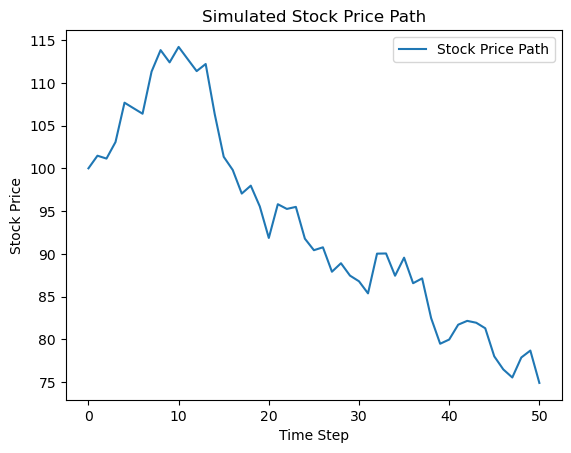

In [38]:
# Parameters
S0 = 100           # Initial stock price
K = 110            # Strike price
T = 1              # Time to maturity in years
r = 0.05           # Risk-free interest rate
sigma = 0.2        # Volatility
n_steps = 50       # Number of time steps for the simulation
dt = T / n_steps   # Length of each time step

# Generate a simple stock price path with Geometric Brownian Motion
np.random.seed(42)  # For reproducibility
stock_prices = [S0]
for _ in range(n_steps):
    S_t = stock_prices[-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.normal())
    stock_prices.append(S_t)
stock_prices = np.array(stock_prices)

# Plot the stock price path
plt.plot(stock_prices, label="Stock Price Path")
plt.xlabel("Time Step")
plt.ylabel("Stock Price")
plt.title("Simulated Stock Price Path")
plt.legend()
plt.show()

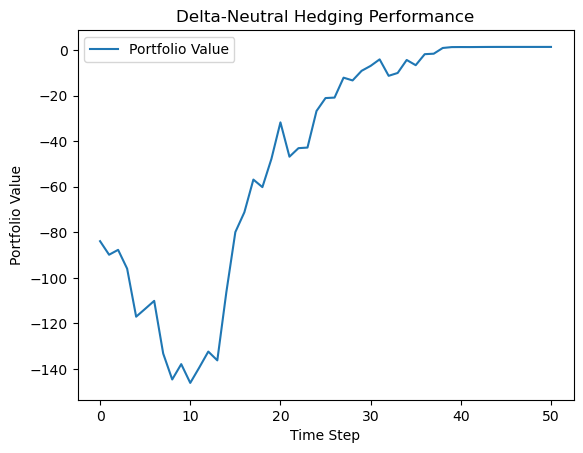

Total Hedge Adjustment Costs: 139.93


In [40]:
# Delta-neutral hedging with updated cash position adjustment
deltas = [f.delta_call(stock_prices[0], K, T, r, sigma)]
shares_held = -deltas[0]  # Short shares equal to Delta for call option hedge
cash_position = f.black_scholes_call(stock_prices[0], K, T, r, sigma) + shares_held * stock_prices[0]

# Tracking variables
portfolio_values = [cash_position + shares_held * stock_prices[0]]
hedge_costs = 0

for i in range(1, len(stock_prices)):
    # Update time to maturity
    remaining_T = T - i * dt

    # Calculate the new Delta
    current_delta = f.delta_call(stock_prices[i], K, remaining_T, r, sigma)
    delta_adjustment = current_delta - deltas[-1]
    deltas.append(current_delta)

    # Adjust the hedge by updating shares held and adjusting cash position
    shares_bought_or_sold = delta_adjustment * stock_prices[i]
    cash_position -= shares_bought_or_sold
    shares_held -= delta_adjustment

    # Track hedge costs as the total change in cash position
    hedge_costs += abs(shares_bought_or_sold)

    # Calculate portfolio value
    portfolio_value = cash_position + shares_held * stock_prices[i]
    portfolio_values.append(portfolio_value)

# Plot results
plt.plot(portfolio_values, label="Portfolio Value")
plt.xlabel("Time Step")
plt.ylabel("Portfolio Value")
plt.title("Delta-Neutral Hedging Performance")
plt.legend()
plt.show()

print(f"Total Hedge Adjustment Costs: {hedge_costs:.2f}")

In [44]:
# Parameters
S0 = 100       # Initial stock price
K = 110        # Strike price
T = 1          # Time to maturity in years
r = 0.05       # Risk-free interest rate
sigma = 0.2    # Volatility
steps = 50     # Number of steps in the binomial tree

# Price European and American Call Options
european_call_price = f.binomial_tree_call(S0, K, T, r, sigma, steps, american=False)
american_call_price = f.binomial_tree_call(S0, K, T, r, sigma, steps, american=True)

print(f"European Call Option Price: {european_call_price:.2f}")
print(f"American Call Option Price: {american_call_price:.2f}")


European Call Option Price: 6.06
American Call Option Price: 6.06


In [48]:
# Parameters
S0 = 100       # Initial stock price
K = 110        # Strike price
T = 1          # Time to maturity in years
r = 0.05       # Risk-free interest rate
sigma = 0.2    # Volatility
steps = 50     # Number of steps in the binomial tree

# Price European and American Put Options
european_put_price = f.binomial_tree_put(S0, K, T, r, sigma, steps, american=False)
american_put_price = f.binomial_tree_put(S0, K, T, r, sigma, steps, american=True)

print(f"European Put Option Price: {european_put_price:.2f}")
print(f"American Put Option Price: {american_put_price:.2f}")


European Put Option Price: 10.70
American Put Option Price: 11.98


In [56]:
# Parameters
S0 = 100       # Initial stock price
K = 110        # Strike price
T = 1          # Time to maturity in years
r = 0.05       # Risk-free interest rate
sigma = 0.2    # Volatility
n_simulations = 50000  # Number of Monte Carlo simulations

# Calculate the option price using Monte Carlo simulation
mc_call_price = f.monte_carlo_option_price_antithetic(S0, K, T, r, sigma, n_simulations=n_simulations, steps=100)

print(f"Monte Carlo Estimated European Call Option Price: {mc_call_price:.2f}")


Monte Carlo Estimated European Call Option Price: 6.06


In [58]:
# Parameters
S0 = 100       # Initial stock price
K = 110        # Strike price
T = 1          # Time to maturity in years
r = 0.05       # Risk-free interest rate
sigma = 0.2    # Volatility
n_simulations = 50000  # Number of simulations for better accuracy

# Calculate the option price using the Monte Carlo Asian option function
mc_asian_call_price = f.monte_carlo_asian_call(S0, K, T, r, sigma, n_simulations=n_simulations, steps=100)

print(f"Monte Carlo Estimated Asian Call Option Price: {mc_asian_call_price:.2f}")


Monte Carlo Estimated Asian Call Option Price: 1.97


In [62]:
# Parameters
S0 = 100       # Initial stock price
K = 110        # Strike price
T = 1          # Time to maturity in years
r = 0.05       # Risk-free interest rate
sigma = 0.2    # Volatility
n_simulations = 50000  # Number of simulations for better accuracy

# Calculate the option price using the Monte Carlo Asian put option function
mc_asian_put_price = f.monte_carlo_asian_put(S0, K, T, r, sigma, n_simulations=n_simulations, steps=100)

print(f"Monte Carlo Estimated Asian Put Option Price: {mc_asian_put_price:.2f}")


Monte Carlo Estimated Asian Put Option Price: 9.03


In [66]:
# Parameters
S0 = 100       # Initial stock price
K = 110        # Strike price
T = 1          # Time to maturity in years
r = 0.05       # Risk-free interest rate
sigma = 0.2    # Volatility
n_simulations = 50000  # Number of simulations for better accuracy

# Calculate the option price using the Monte Carlo European put option with antithetic variates
mc_european_put_price = f.monte_carlo_european_put_antithetic(S0, K, T, r, sigma, n_simulations=n_simulations, steps=100)

print(f"Monte Carlo Estimated European Put Option Price: {mc_european_put_price:.2f}")


Monte Carlo Estimated European Put Option Price: 10.63


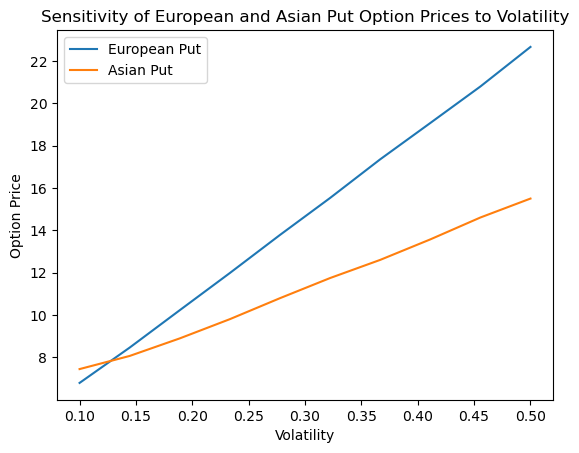

In [70]:
# Define parameter ranges
volatilities = np.linspace(0.1, 0.5, 10)  # Range of volatilities from 10% to 50%
S0 = 100       # Initial stock price
K = 110        # Strike price
T = 1          # Time to maturity in years
r = 0.05       # Risk-free interest rate
n_simulations = 50000
steps = 100

# Arrays to store results
european_put_prices = []
asian_put_prices = []

# Calculate option prices for each volatility
for sigma in volatilities:
    european_put_price = f.monte_carlo_european_put_antithetic(S0, K, T, r, sigma, n_simulations, steps)
    asian_put_price = f.monte_carlo_asian_put(S0, K, T, r, sigma, n_simulations, steps)
    european_put_prices.append(european_put_price)
    asian_put_prices.append(asian_put_price)

# Plot the results
plt.plot(volatilities, european_put_prices, label="European Put")
plt.plot(volatilities, asian_put_prices, label="Asian Put")
plt.xlabel("Volatility")
plt.ylabel("Option Price")
plt.title("Sensitivity of European and Asian Put Option Prices to Volatility")
plt.legend()
plt.show()

In [76]:
# Sample parameters
S = 100       # Stock price
K = 110       # Strike price
T = 1         # Time to maturity in years
r = 0.05      # Risk-free rate
market_price = 6.00  # Observed market price of the option

# Calculate implied volatility
iv_call = f.implied_volatility_call(S, K, T, r, market_price)
print(f"Implied Volatility for Call Option: {iv_call:.4f}")


Implied Volatility for Call Option: 0.1990


/home/kali/Projects/Option Pricing/functions.py:253: RuntimeWarning: divide by zero encountered in scalar divide


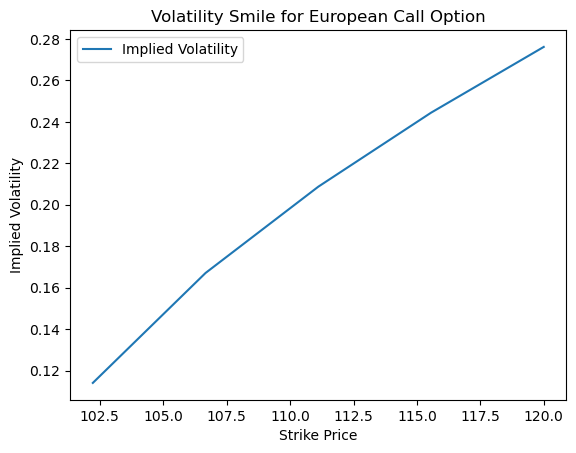

In [80]:
# Sample parameters for the volatility smile
S = 100          # Current stock price
T = 1            # Time to maturity in years
r = 0.05         # Risk-free interest rate
market_price = 6.00  # Observed option market price (adjust if needed for different strikes)

# Range of strike prices for the volatility smile
strike_prices = np.linspace(80, 120, 10)

# Calculate implied volatilities for each strike price
implied_vols = []
for K in strike_prices:
    iv = f.implied_volatility_call(S, K, T, r, market_price)
    implied_vols.append(iv)

# Plot the volatility smile
plt.plot(strike_prices, implied_vols, label="Implied Volatility")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.title("Volatility Smile for European Call Option")
plt.legend()
plt.show()


In [82]:
import yfinance as yf

# Fetch historical data for the underlying asset
ticker = 'AAPL'  # Ticker
data = yf.download(ticker, start='2022-01-01', end='2023-01-01')
data['Returns'] = data['Adj Close'].pct_change()

# Calculate historical volatility (annualized)
daily_std = np.std(data['Returns'].dropna())  # Standard deviation of daily returns
historical_volatility = daily_std * np.sqrt(252)  # Annualize by multiplying by sqrt(252)

print(f"Historical Volatility: {historical_volatility:.4f}")


[*********************100%***********************]  1 of 1 completed

Historical Volatility: 0.3560


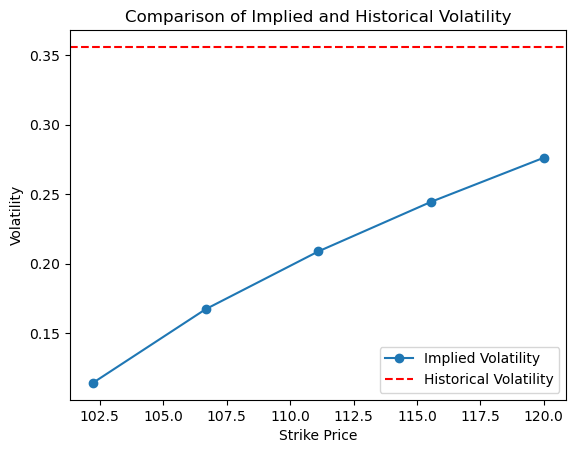

In [84]:

#Historical_volatility is the calculated historical volatility
strike_prices = np.linspace(80, 120, len(implied_vols))

# Plot the implied volatility smile and historical volatility
plt.plot(strike_prices, implied_vols, label="Implied Volatility", marker='o')
plt.axhline(y=historical_volatility, color='r', linestyle='--', label="Historical Volatility")
plt.xlabel("Strike Price")
plt.ylabel("Volatility")
plt.title("Comparison of Implied and Historical Volatility")
plt.legend()
plt.show()


In [86]:
# Parameters
historical_volatility_threshold = historical_volatility * 0.9  # Threshold 10% below historical volatility

# Identify strike prices where implied volatility is below threshold
selected_strikes = [strike for strike, iv in zip(strike_prices, implied_vols) if iv < historical_volatility_threshold]


In [104]:
# Parameters for the strategy
S = 100            # Current stock price
K = 100            # ATM strike price for simplicity
T = 1              # Time to maturity (in years)
r = 0.05           # Risk-free interest rate
sigma_implied = 0.2  # Initial implied volatility for the ATM options (could vary by strike)
historical_volatility = 0.35  # Historical volatility from previous calculations
target_volatility = historical_volatility  # Target exit level for implied volatility
time_horizon = 30  # Exit after 30 days if volatility hasn’t changed

# Set up the straddle
call_price = f.black_scholes_call(S, K, T, r, sigma_implied)
put_price = f.black_scholes_put(S, K, T, r, sigma_implied)
straddle_cost = call_price + put_price
print(f"Initial Cost of Straddle (Call + Put): {straddle_cost:.2f}")

# Calculate initial Deltas for Delta-neutral hedging
call_delta = f.delta_call(S, K, T, r, sigma_implied)
put_delta = f.delta_put(S, K, T, r, sigma_implied)
total_delta = call_delta + put_delta

# Hedge by shorting the underlying asset to neutralize Delta
shares_to_short = -total_delta
print(f"Initial Delta to Hedge (Shares to Short): {shares_to_short:.2f}")

# Track the previous delta adjustment for significant changes
previous_delta = shares_to_short

# Monitoring loop for Delta-neutral adjustments
print("\nDaily Delta Hedge Adjustments:")
for day in range(time_horizon):
    T_remaining = T - day / 252  # Update time to maturity

    # Assume a constant implied volatility for simplicity; replace with actual data in practice
    current_iv = sigma_implied

    # Exit condition
    if current_iv >= target_volatility:
        print(f"\nExit position on Day {day+1} as implied volatility reached the historical level.")
        break

    # Calculate updated Delta for the call and put
    call_delta = f.delta_call(S, K, T_remaining, r, current_iv)
    put_delta = f.delta_put(S, K, T_remaining, r, current_iv)
    total_delta = call_delta + put_delta
    shares_to_short = -total_delta

    # Print Delta adjustment only if it has changed significantly
    if abs(shares_to_short - previous_delta) > 0.01:
        print(f"Day {day+1} - Delta Hedge Adjustment: Short {shares_to_short:.2f} shares to stay Delta-neutral")
        previous_delta = shares_to_short

# Final summary
print("\nStrategy Summary:")
print(f"Total Initial Cost of Straddle: {straddle_cost:.2f}")
print(f"Final Delta Adjustment: {shares_to_short:.2f} shares shorted")
print(f"Exit Condition: {'Implied volatility reached historical level' if current_iv >= target_volatility else 'Time horizon reached'}")


Initial Cost of Straddle (Call + Put): 16.02
Initial Delta to Hedge (Shares to Short): -0.27

Daily Delta Hedge Adjustments:
Day 20 - Delta Hedge Adjustment: Short -0.26 shares to stay Delta-neutral

Strategy Summary:
Total Initial Cost of Straddle: 16.02
Final Delta Adjustment: -0.26 shares shorted
Exit Condition: Time horizon reached
